In [1]:
import pandas as pd # For dataframes
import numpy as np # For arrays and numerical calcs
import matplotlib.pyplot as plt # for plotting & visualizing
import statsmodels.formula.api as smf # for model building using OLS method

In [2]:
# Importing Data
cars = pd.read_csv("Datasets/cars.csv")

In [3]:
# Checking first few entries in the data
cars.head(10) 

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
5,70,45.696322,89,113.185353,29.591768
6,55,50.013401,92,105.461264,30.308480
7,62,46.716554,50,102.598513,15.847758
8,62,46.716554,50,102.598513,16.359484
9,80,42.299078,94,115.645204,30.920154


In [4]:
# Checking for null values in any coulumns
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [5]:
# checling Correlation matrix because we are interested to build Linear regression model 
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


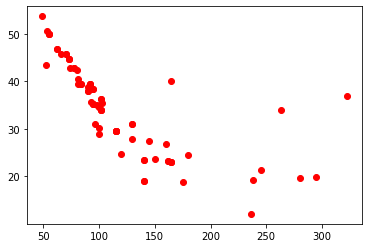

In [6]:
# Bivariate analysis using scatter plot (we can do for all combinations separately just by changing names of the columns)
plt.plot(cars.HP,cars.MPG,"ro")

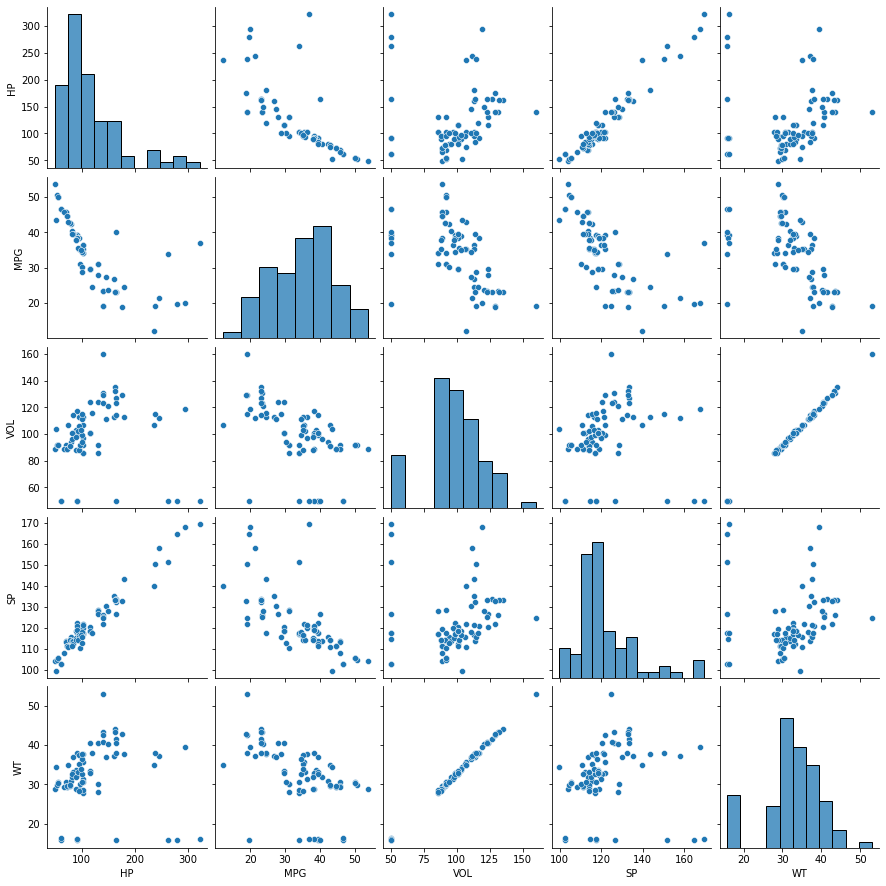

In [6]:
# Multivariate analysis for all the columns
import seaborn as sns
sns.pairplot(cars)

In [7]:
# preparing model considering all the variables - Default model

model_default = smf.ols('MPG ~ WT + VOL + SP + HP',data=cars).fit() # regression model

In [8]:
# Checking Model parameters & intercept
model_default.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [34]:
# Checking model summary (info like p_values, r_squared etc)
model_default.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.54e-23
Time:                        09:10:43   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Default model shows p-values for WT, VOL are more than 0.05 and also we know that [WT,VOL] has high correlation value from correlation matrix

In [9]:
# preparing model based only on Volume (here we are checking what if MPG can be modelled only with volume)

ml_v=smf.ols('MPG ~ VOL',data = cars).fit()  
ml_v.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           3.82e-07
Time:                        15:17:23   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Above model shows if we model only with volume then the model parameters are significant

In [10]:
# Preparing model based only on WT (here we are checking what if MPG can be modelled only with weight)

ml_w=smf.ols('MPG ~ WT',data = cars).fit()  
ml_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           4.38e-07
Time:                        15:17:53   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Above model shows if we model only with weight then again the model parameters are significant

In [11]:
# Preparing model based only on WT & VOL ((here we are checking what if MPG can be modelled with volume & weight both))

ml_wv=smf.ols('MPG ~ WT + VOL',data = cars).fit()  
ml_wv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           2.43e-06
Time:                        15:18:34   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Above model shows that Both coefficient's p-value became insignificant... So there may be a chance of considering only one among VOL & WT

## But then if we drop one column then there is data loss

### There is a possibility that the data may have any influential value which is causing the above problem, so let's check it influential values influence index plots

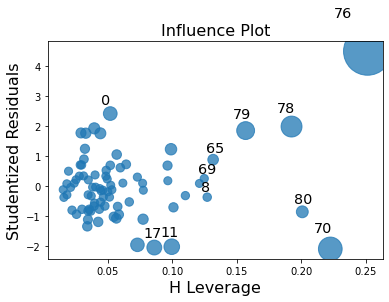

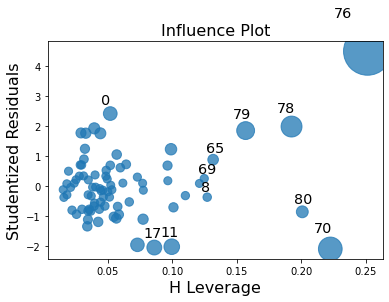

In [12]:
# Checking influential observations, 
# this plot will show us which observations are having influential values

import statsmodels.api as sm
sm.graphics.influence_plot(model_default)

## Index 76, 70 even 78 and other few records is showing high influence so we can exclude that entire row of some of these index numbers

In [13]:
# Creating new dataset by dropping highest influential records i.e. 76 and 70
cars_new = cars.drop(cars.index[[70,76]],axis=0)

In [14]:
print(cars.shape)
print(cars_new.shape)

(81, 5)
(79, 5)


In [15]:
# Preparing model on new dataset                 
ml_new = smf.ols('MPG ~ WT + VOL + HP + SP',data = cars_new).fit()   

In [16]:
# Getting coefficients of variables (model parameters)       
ml_new.params

Intercept    25.262686
WT           -0.130515
VOL          -0.138784
HP           -0.229533
SP            0.443356
dtype: float64

In [17]:
# CHecking summary of this model from new dataset
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     82.15
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           1.89e-26
Time:                        15:27:26   Log-Likelihood:                -219.05
No. Observations:                  79   AIC:                             448.1
Df Residuals:                      74   BIC:                             460.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2627     13.495      1.872      0.065      -1.627      52.152
WT            -0.1305      1.519     -0.086      0.932      -3.158       2.897
VOL           -0.1388      0.510     -0.272      0.786      -1.155       0.877
HP            -0.2295      0.035     -6.489      0.000      -0.300      -0.159
SP             0.4434      0.144      3.081      0.003       0.157       0.730
==============================================================================
Omnibus:                        6.476   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.764
Skew:                           0.617   Prob(JB):                       0.0560
Kurtosis:                       3.479   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### In above model though coeffiecients fro volume and weight have not become significant but r-squared of this model has improved than the default model above from 77 to 81

In [18]:
# let's observe the difference between predictions and the actual values in the data for MPG 
mpg_pred = ml_new.predict(cars_new)
mpg_pred

0     44.101073
1     42.650709
2     42.686370
3     42.732995
4     42.741815
        ...    
75    20.514193
77    16.483189
78    23.110302
79    10.349075
80    13.680984
Length: 79, dtype: float64

In [19]:
cars_new.head() #we can check the difference between actual values and predicted values above

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Can we check the Variance Inflation Factor of the features ? But what is that ?

###  What is the Variance Inflation Factor (VIF)?

The Variance Inflation Factor (VIF) measures the severity of multicollinearity in regression analysis. It is a statistical concept that indicates the increase in the variance of a regression coefficient as a result of collinearity.

## Variance Inflation Factor and Multicollinearity

In ordinary least square (OLS) regression analysis, multicollinearity exists when two or more of the independent variables demonstrate a linear relationship between them.


With multicollinearity, the regression coefficients are still consistent but are no longer reliable since the standard errors are inflated. It means that the model’s predictive power is not reduced, but the coefficients may not be statistically significant with a Type II error.

Therefore, if the coefficients of variables are not individually significant – cannot be rejected in the t-test, respectively – but can jointly explain the variance of the dependent variable with rejection in the F-test and a high coefficient of determination (R2), multicollinearity might exist. It is one of the methods to detect multicollinearity.

VIF is another commonly used tool to detect whether multicollinearity exists in a regression model. It measures how much the variance (or standard error) of the estimated regression coefficient is inflated due to collinearity.

# VIF can be calculated by the formula below:

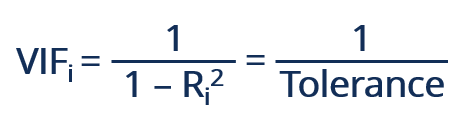

Where Ri2 represents the unadjusted coefficient of determination for regressing the ith independent variable on the remaining ones. The reciprocal of VIF is known as tolerance. Either VIF or tolerance can be used to detect multicollinearity, depending on personal preference.

If Ri2 is equal to 0, the variance of the remaining independent variables cannot be predicted from the ith independent variable. Therefore, when VIF or tolerance is equal to 1, the ith independent variable is not correlated to the remaining ones, which means multicollinearity does not exist in this regression model. In this case, the variance of the ith regression coefficient is not inflated.

Generally, a VIF above 4 or tolerance below 0.25 indicates that multicollinearity might exist, and further investigation is required. When VIF is higher than 10 or tolerance is lower than 0.1, there is significant multicollinearity that needs to be corrected.

However, there are also situations where high VFIs can be safely ignored without suffering from multicollinearity. The following are three such situations:

1. High VIFs only exist in control variables but not in variables of interest. In this case, the variables of interest are not collinear to each other or the control variables. The regression coefficients are not impacted.


2. When high VIFs are caused as a result of the inclusion of the products or powers of other variables, multicollinearity does not cause negative impacts. For example, a regression model includes both x and x2 as its independent variables.


3. When a dummy variable that represents more than two categories has a high VIF, multicollinearity does not necessarily exist. The variables will always have high VIFs if there is a small portion of cases in the category, regardless of whether the categorical variables are correlated to other variables.

# From the above we can see how to calculate the VIF and what is the accpted value of VIF for variable is not having or involved in multicolliniarity i.e. VIF shall not be greater than 10

In [20]:
# calculating VIF's (variance inflation factor) values of independent variables

rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars_new).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 16.33 #14.92

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars_new).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars_new).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars_new).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35

In [21]:
# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,14.927705
1,WT,567.779711
2,VOL,566.722324
3,SP,15.290511


As weight is having heighest VIF value, we may not going to include this in prediction model but lets see other investigations as well, as dropping a variable is a data loss, so we are trying to confirm it from Added variable plot by checking the slope of the line

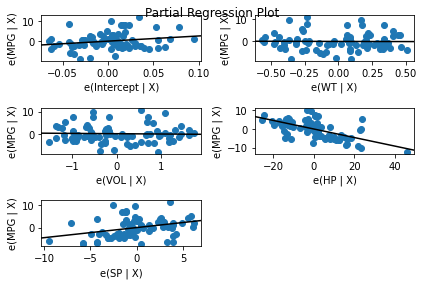

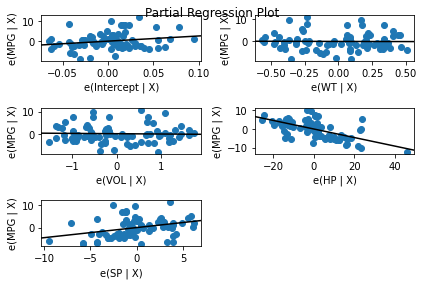

In [24]:
# Added varible plot 
sm.graphics.plot_partregress_grid(ml_new)

In [22]:
# checking with this final model by dropping weight column (remember we have already dropped 2 rows and hence we are using cars_new)

final_ml= smf.ols('MPG ~ VOL + SP + HP',data = cars_new).fit()
print(final_ml.params)
final_ml.summary() 

Intercept    25.527511
VOL          -0.182530
SP            0.441482
HP           -0.229084
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     111.0
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           1.65e-27
Time:                        15:49:06   Log-Likelihood:                -219.06
No. Observations:                  79   AIC:                             446.1
Df Residuals:                      75   BIC:                             455.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5275     13.051      1.956      0.054      -0.471      51.526
VOL           -0.1825      0.023     -8.012      0.000      -0.228      -0.137
SP             0.4415      0.141      3.124      0.003       0.160       0.723
HP            -0.2291      0.035     -6.592      0.000      -0.298      -0.160
==============================================================================
Omnibus:                        6.541   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.833
Skew:                           0.620   Prob(JB):                       0.0541
Kurtosis:                       3.485   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Doing the predictions
mpg_pred = final_ml.predict(cars_new)

In [25]:
# Calculating errors
mpg_resid  = mpg_pred - cars_new.MPG

In [26]:
# Calculating RMSE
mpg_rmse = np.sqrt(np.mean(mpg_resid*mpg_resid))

Text(0, 0.5, 'fitted_values')

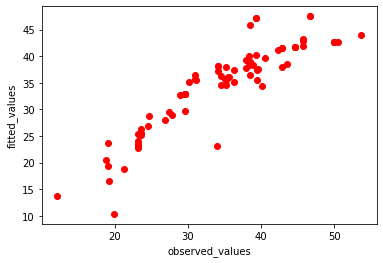

In [27]:
######  Checking Linearity #########

# Observed values VS Fitted values
plt.scatter(cars_new.MPG,mpg_pred,c="r");
plt.xlabel("observed_values");
plt.ylabel("fitted_values")

Text(0, 0.5, 'residuals')

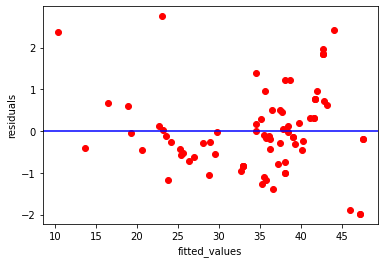

In [28]:
############ Checking Homoscedasticity #######

# Residuals VS Fitted Values 
plt.scatter(mpg_pred,final_ml.resid_pearson,c="r");
plt.axhline(y=0,color='blue');
plt.xlabel("fitted_values");
plt.ylabel("residuals")

(array([ 3.,  6., 12., 21., 15., 10.,  4.,  1.,  4.,  3.]),
 array([-1.98480369, -1.51158404, -1.0383644 , -0.56514475, -0.09192511,
         0.38129454,  0.85451418,  1.32773383,  1.80095347,  2.27417312,
         2.74739276]),
 <BarContainer object of 10 artists>)

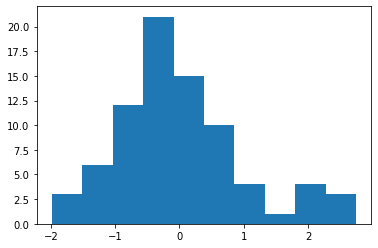

In [29]:
########    Checking Normality plot for residuals distribution ######
# histogram
plt.hist(final_ml.resid_pearson) # Checking the standardized residuals are normally distributed

((array([-2.37663702, -2.02958204, -1.82767017, -1.68081377, -1.5632274 ,
         -1.46398099, -1.37736584, -1.30000518, -1.22972736, -1.16504879,
         -1.10490843, -1.04851956, -0.99528161, -0.94472489, -0.89647454,
         -0.8502261 , -0.80572849, -0.76277189, -0.72117887, -0.68079772,
         -0.64149747, -0.60316407, -0.5656973 , -0.52900844, -0.49301835,
         -0.45765594, -0.4228569 , -0.38856265, -0.35471952, -0.32127797,
         -0.288192  , -0.25541861, -0.22291736, -0.19064996, -0.15857989,
         -0.12667214, -0.09489286, -0.06320916, -0.0315888 ,  0.        ,
          0.0315888 ,  0.06320916,  0.09489286,  0.12667214,  0.15857989,
          0.19064996,  0.22291736,  0.25541861,  0.288192  ,  0.32127797,
          0.35471952,  0.38856265,  0.4228569 ,  0.45765594,  0.49301835,
          0.52900844,  0.5656973 ,  0.60316407,  0.64149747,  0.68079772,
          0.72117887,  0.76277189,  0.80572849,  0.8502261 ,  0.89647454,
          0.94472489,  0.99528161,  1.

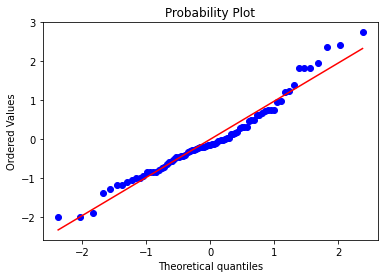

In [30]:
# Checking QQ plot for residuals distribution
import pylab          
import scipy.stats as st

# Checking Residuals are normally distributed
st.probplot(final_ml.resid_pearson, dist="norm", plot=pylab)

In [49]:
### Splitting the data into train and test data  and rebuild the final model using OLS method (cars_new)

from sklearn.model_selection import train_test_split
cars_train,cars_test  = train_test_split(cars_new, test_size = 0.2) # 20% size
print(cars_train.shape)
print(cars_test.shape)

(63, 5)
(16, 5)


In [50]:
# preparing the model on train data 

model_train = smf.ols("MPG ~ HP + SP + VOL",data = cars_train).fit()

In [51]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     101.4
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           2.98e-23
Time:                        16:54:22   Log-Likelihood:                -171.30
No. Observations:                  63   AIC:                             350.6
Df Residuals:                      59   BIC:                             359.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.0759     13.872      1.159      0.251     -11.681      43.833
HP            -0.2656      0.036     -7.306      0.000      -0.338      -0.193
SP             0.5388      0.150      3.603      0.001       0.240       0.838
VOL           -0.1652      0.029     -5.666      0.000      -0.224      -0.107
==============================================================================
Omnibus:                       10.451   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.267
Skew:                           0.888   Prob(JB):                      0.00590
Kurtosis:                       3.869   Cond. No.                     5.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# train_data prediction
train_pred = model_train.predict(cars_train)

In [53]:
# train model residual values 
train_resid  = train_pred - cars_train.MPG

In [54]:
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

3.6698412299750247

In [55]:
# prediction on test data set 
test_pred = model_train.predict(cars_test)

In [56]:
# test residual values 
test_resid  = test_pred - cars_test.MPG

In [57]:
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse

4.872736455011815

# Model buliding on cars data using sklearn

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
cars_train

,HP,MPG,VOL,SP,WT
71,162,23.203569,135,133.415985,44.013139
40,95,35.152727,113,116.392639,37.392524
30,84,39.431235,114,113.484609,37.042350
34,81,39.531633,101,111.288996,32.701644
5,70,45.696322,89,113.185353,29.591768
...,...,...,...,...,...
37,102,34.070668,86,116.909442,27.879915
46,100,34.561499,111,118.208698,36.498617
41,95,35.152727,106,115.748847,35.027176
74,140,19.086341,129,121.864163,42.618698


In [44]:
Y_train = cars_train.iloc[:,[1]]

In [45]:
X_train = cars_train.iloc[:,[0,2,3,]]

In [47]:
#Y = cars.iloc[:,[1]]
#X = cars.iloc[:,[0,2,3,4]]

In [46]:
Y_train

,MPG
71,23.203569
40,35.152727
30,39.431235
34,39.531633
5,45.696322
...,...
37,34.070668
46,34.561499
41,35.152727
74,19.086341


In [47]:
X_train

,HP,VOL,SP
71,162,135,133.415985
40,95,113,116.392639
30,84,114,113.484609
34,81,101,111.288996
5,70,89,113.185353
...,...,...,...
37,102,86,116.909442
46,100,111,118.208698
41,95,106,115.748847
74,140,129,121.864163


In [48]:
model_cars = LinearRegression()

In [49]:
model_cars.fit(X_train,Y_train)

LinearRegression()

In [50]:
model_cars.coef_

array([[-0.21766214, -0.17665693,  0.37296581]])

In [51]:
model_cars.intercept_

array([31.61158675])

In [52]:
model_cars.score(X_train,Y_train)

0.8250606486264711

In [53]:
pred_train = model_cars.predict(X_train)

In [54]:
rmse_train = np.sqrt(np.mean((pred_train-Y_train)**2)) # 32.760
rmse_train

MPG    3.829124
dtype: float64

In [55]:
cars_test

,HP,MPG,VOL,SP,WT
1,55,50.013401,92,105.461264,30.466833
79,295,19.833733,119,167.944460,39.423099
20,92,38.411003,99,119.105055,32.324650
12,92,39.354094,99,122.105055,32.813592
27,92,38.411003,99,119.105055,32.835069
26,92,38.411003,117,120.760520,38.062823
29,103,35.404192,107,121.840817,35.549360
13,73,44.652834,89,111.185353,29.378436
19,90,38.901834,103,118.472936,33.516974
60,145,27.354265,111,130.208698,36.888153


In [56]:
cars_test.shape

(16, 5)

In [57]:
Y_test = cars_test.iloc[:,[1]]
X_test = cars_test.iloc[:,[0,2,3,]]

In [58]:
Y_test

,MPG
1,50.013401
79,19.833733
20,38.411003
12,39.354094
27,38.411003
26,38.411003
29,35.404192
13,44.652834
19,38.901834
60,27.354265


In [59]:
X_test

,HP,VOL,SP
1,55,92,105.461264
79,295,119,167.944460
20,92,99,119.105055
12,92,99,122.105055
27,92,99,119.105055
26,92,117,120.760520
29,103,107,121.840817
13,73,89,111.185353
19,90,103,118.472936
60,145,111,130.208698


In [60]:
pred_test = model_cars.predict(X_test)

In [61]:
rmse_test = np.sqrt(np.mean((pred_test-Y_test)**2)) # 32.760
rmse_test

MPG    4.148158
dtype: float64